In [1]:
import numpy as np
import scipy
import scipy.optimize
from scipy.optimize import curve_fit
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.colors as mcolors
from mpl_toolkits import mplot3d
import glob
import time
import pandas as pd
from PIL import Image
from scipy.stats import gaussian_kde
import seaborn as sns
from matplotlib.animation import FuncAnimation
plt.rcParams["figure.figsize"] = (3,3)

print (time.ctime())

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.
Thu Aug 27 09:13:45 2020


In [2]:
x1=83.63314485147552 ; y1=103.56078337204558
x2=89.87622732198322 ; y2=103.59569113653744
x3=95.67979844778523 ; y3=103.57261818625021
x4=101.35139921500111 ; y4=103.64573287525187
x5=107.12725046191181 ; y5=103.55650885357784
x6=113.06158595298297 ; y6=103.53295845237241
x7=119.312467897662 ; y7=103.54974987388628
x8=126.70364773168521 ; y8=103.39793985834332

old_data_table = pd.read_csv('Trigger Data Pandas')


In [17]:
r=np.sqrt(2)
Ion_1 = (
        old_data_table
        .query("`cluster size` > 4")
        .query(f"((xc-{x1})**2 + (yc-{y1})**2)**(1/2) <= {r}**2")
        #.query(f"-1.5<=(xc-{x1})<=1.5 and -1.5<=(yc-{y1})<=1.5")
        .query(f"1.53e11 < time < 1.9e11 or 1.98e11 < time < 2.025e11 or 2.07e11 < time < 2.4e11")
        .reset_index(drop=True)
)

Ion_2 = (
        old_data_table
        .query("`cluster size` > 4")
        .query(f"((xc-{x2})**2 + (yc-{y2})**2)**(1/2) <= {r}**2")
        #.query(f"-1.5<=(xc-{x2})<=1.5 and -1.5<=(yc-{y2})<=1.5")
        .query(f"0 < time < .29e11 or .37e11 < time< .41e11 or 1.53e11 < time < 1.7e11 or 1.92e11< time < 2.5e11 or 2.7e11 < time < 2.86e11")
        .reset_index(drop=True)
)

Ion_3 = (
        old_data_table
        .query("`cluster size` > 4")
        .query(f"((xc-{x3})**2 + (yc-{y3})**2)**(1/2) <= {r}**2")
        #.query(f"-1.5<=(xc-{x3})<=1.5 and -1.5<=(yc-{y3})<=1.5")
        .query(f"0 < time < 1.53e11")
        .reset_index(drop=True)
)

Ion_4 = (
        old_data_table
        .query("`cluster size` > 4")
        .query(f"((xc-{x4})**2 + (yc-{y4})**2)**(1/2) <= {r}**2")
        #.query(f"-1.5<=(xc-{x4})<=1.5 and -1.5<=(yc-{y4})<=1.5")
        .query(f"1.53e11 < time < 2.4e11")
        .reset_index(drop=True)
)

Ion_5 = (
        old_data_table
        .query("`cluster size` > 4")
        .query(f"((xc-{x5})**2 + (yc-{y5})**2)**(1/2) <= {r}**2")
        #.query(f"-1.5<=(xc-{x5})<=1.5 and -1.5<=(yc-{y5})<=1.5")
        .query(f"1.53e11 < time < 2.18e11 or 2.7e11 < time < 3e11")
        .reset_index(drop=True)
)

Ion_6 = (
        old_data_table
        .query("`cluster size` > 4")
        .query(f"((xc-{x6})**2 + (yc-{y6})**2)**(1/2) <= {r}**2")
        #.query(f"-1.5<=(xc-{x6})<=1.5 and -1.5<=(yc-{y6})<=1.5")
        .query(f"time < 1.53e11 or 2.16e11 < time < 2.52e11")
        .reset_index(drop=True)
)

Ion_7 = (
        old_data_table
        .query("`cluster size` > 4")
        .query(f"((xc-{x7})**2 + (yc-{y7})**2)**(1/2) <= {r}**2")
        #.query(f"-1.5<=(xc-{x7})<=1.5 and -1.5<=(yc-{y7})<=1.5")
        .query(f" time < .41e11 or .53e11 < time < 1.53e11 or 2.39e11 < time < 2.52e11 or 2.69e11 < time < 2.82e11")
        .reset_index(drop=True)
)

Ion_8 = (
        old_data_table
        .query("`cluster size` > 4")
        .query(f"((xc-{x8})**2 + (yc-{y8})**2)**(1/2) <= {r}**2")
        #.query(f"-1.5<=(xc-{x8})<=1.5 and -1.5<=(yc-{y8})<=1.5")
        .query(f".41e11 < time < 1.53e11 or 2.69e11 < time")
        .reset_index(drop=True)
)



In [18]:
data_table = Ion_1
data_table = data_table.append(Ion_2)
data_table = data_table.append(Ion_3)
data_table = data_table.append(Ion_4)
data_table = data_table.append(Ion_5)
data_table = data_table.append(Ion_6)
data_table = data_table.append(Ion_7)
data_table = data_table.append(Ion_8)

In [19]:
def Gaussian(x, xm, sigma, A, c):
    return np.absolute(A)*np.exp(-np.power((x-xm)/sigma,2)/2) + c

In [20]:
class Ion:
    def __init__(self, n, x, x0, x1, y, y0, y1, r0, data, debugPrinting=False):
        self.n = n
        self.x = x
        self.x0 = x0
        self.x1 = x1
        self.y = y
        self.y0 = y0
        self.y1 = y1
        self.r0 = r0
        self.data = data
        self.debugPrinting = debugPrinting
        
        
    def save_micromotion(self, tbins, pbins):
        self.tbins = tbins
        self.pbins = pbins
        
        x = self.data['xc']; y = self.data['yc']; t = self.data['tfold']
        dtbins_x = []; dtbins_y = []
        Tmin = min(data_table['tfold'])
        Tmax = max(data_table['tfold'])
        
        hist_xt, bins_xt = np.histogram(self.data['xc'], self.pbins, (self.x-2,self.x+2)) #, density=True)
        hist_yt, bins_yt = np.histogram(self.data['yc'], self.pbins, (self.y-2,self.y+2)) #, density=True)
        

        print ('Tmin =', Tmin, ' Tmax = ', Tmax, 'length = ', Tmax-Tmin)

        Tbin = (Tmax - Tmin)/self.tbins
        for i in range(0,self.tbins):
            start = Tmin + i*Tbin; stop = start + Tbin
            dtbins_x.append([])
            dtbins_y.append([])
            if (i/10).is_integer() is True:
                print(i)
            for j in range(len(x)):
                if(start < t[j] < stop): 
                    dtbins_x[i].append(x[j])
                    dtbins_y[i].append(y[j])
            
        mean_x = []; mean_y = []
        sigma_x = []; sigma_y = []
        amp_x = []; amp_y = []
        c_x = []; c_y = []
        
        xguess_mean = (self.x)
        xguess_sigma = 1
        xguess_amp = 700/tbins
        xguess_c = 700/tbins/10
        popt_x  = np.array([xguess_mean,xguess_sigma,xguess_amp,xguess_c])
            
        yguess_mean = (self.y)
        yguess_sigma = 1
        yguess_amp = 700/tbins
        yguess_c = 700/tbins/10
        popt_y  = np.array([yguess_mean,yguess_sigma,yguess_amp,yguess_c])
        
               
        for i in range(0, self.tbins):
            hist_x, bins_x = np.histogram(dtbins_x[i], 8, (self.x-2,self.x+2)) #, density=True),
            bin_centres_x = (bins_x[:-1] + bins_x[1:])/2
            
            hist_y, bins_y = np.histogram(dtbins_y[i], 11, (self.y-2,self.y+2)) #, density=True) 
            bin_centres_y = (bins_y[:-1] + bins_y[1:])/2
            
            popt_x, pcov_x = scipy.optimize.curve_fit(Gaussian, bin_centres_x, hist_x, p0=popt_x, maxfev = 50000)
            mean_x.append(popt_x[0]); sigma_x.append(np.sqrt(np.abs(pcov_x[0,0]))); amp_x.append(popt_x[2]); c_x.append(popt_x[3])
            hist_fit_x = Gaussian(bin_centres_x, *popt_x)
            
            popt_y, pcov_y = scipy.optimize.curve_fit(Gaussian, bin_centres_y, hist_y, p0=popt_y, maxfev = 50000)
            mean_y.append(popt_y[0]); sigma_y.append(np.sqrt(np.abs(pcov_y[0,0]))); amp_y.append(popt_y[2]); c_x.append(popt_y[3])
            hist_fit_y = Gaussian(bin_centres_y, *popt_y)
            
        ion_micromotion_data[f'x{self.n}'] = mean_x
        ion_micromotion_data[f'y{self.n}'] = mean_y
        ion_micromotion_data[f'sigma_x{self.n}'] = sigma_x
        ion_micromotion_data[f'sigma_y{self.n}'] = sigma_y
        ion_micromotion_data[f'amp_x{self.n}'] = amp_x
        ion_micromotion_data[f'amp_y{self.n}'] = amp_y
            
        #fig, ax = plt.subplots(3, 2, figsize=(10, 15))
        #ax[0,0].plot(mean_x); ax[0,0].set_title(f"{self.n}X Mean");
        #ax[0,1].plot(mean_y); ax[0,1].set_title(f"{self.n}Y Mean")
        #ax[1,0].plot(sigma_x); ax[1,0].set_title(f"{self.n}X Sigma"); #ax[1,0].set_ylim(-5,7)
        #ax[1,1].plot(sigma_y);ax[1,1].set_title(f"{self.n}Y Sigma"); #ax[1,1].set_ylim(-2,5)
        #ax[2,0].plot(amp_x); ax[2,0].set_title(f"{self.n}X Amplitude"); #ax[2,0].set_ylim(top=300)
        #ax[2,1].plot(amp_y); ax[2,1].set_title(f"{self.n}Y Amplitude"); #ax[2,1].set_ylim(top=260)
        
        #fig = plt.figure(figsize=(5,5))
        #ax = plt.axes(projection='3d')
        #ax.plot3D(mean_x, mean_y, tbins, label='ion path')
        #ax.legend()
        #fig, ax = plt.subplots(1, 1, figsize=(5, 5))
        #ax.plot(mean_x, mean_y, label=f'Ion {self.n} path')
        
    

In [21]:
ion_1 = Ion(1, x1, 80, 88, y1, 100, 108, 3.5, Ion_1 )
ion_2 = Ion(2, x2, 86, 94, y2, 100, 108, 3.5, Ion_2 )
ion_3 = Ion(3, x3, 92, 100, y3, 100, 108, 3.5, Ion_3 )
ion_4 = Ion(4, x4, 98, 106, y4, 100, 108, 3.5, Ion_4 )
ion_5 = Ion(5, x5, 103, 111, y5, 100, 108, 3.5, Ion_5 )
ion_6 = Ion(6, x6, 109, 117, y6, 100, 108, 3.5, Ion_6 )
ion_7 = Ion(7, x7, 116, 124, y7, 100, 108, 3.5, Ion_7 )
ion_8 = Ion(8, x8, 123, 131, y8, 100, 108, 3.5, Ion_8 )

In [22]:
nothing = []
ion_micromotion_data = pd.DataFrame(nothing)
ion_1.save_micromotion(18,12)
ion_2.save_micromotion(18,12)
ion_3.save_micromotion(18,12)
ion_4.save_micromotion(18,12)
ion_5.save_micromotion(18,12)
ion_6.save_micromotion(18,12)
ion_7.save_micromotion(18,12)
ion_8.save_micromotion(18,12)
ion_micromotion_data.to_csv('8 Ion Micromotion Data')

Tmin = 0.005465343749499141  Tmax =  54.78832499999992 length =  54.78285965625042
0
10
Tmin = 0.005465343749499141  Tmax =  54.78832499999992 length =  54.78285965625042
0
10


/home/maverickmillican/.local/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Tmin = 0.005465343749499141  Tmax =  54.78832499999992 length =  54.78285965625042
0
10
Tmin = 0.005465343749499141  Tmax =  54.78832499999992 length =  54.78285965625042
0
10
Tmin = 0.005465343749499141  Tmax =  54.78832499999992 length =  54.78285965625042
0
10
Tmin = 0.005465343749499141  Tmax =  54.78832499999992 length =  54.78285965625042
0
10
Tmin = 0.005465343749499141  Tmax =  54.78832499999992 length =  54.78285965625042
0
10
Tmin = 0.005465343749499141  Tmax =  54.78832499999992 length =  54.78285965625042
0
10


In [32]:
Ion_1_micromotion = (
        ion_micromotion_data[['x1', 'y1', 'sigma_x1', 'sigma_y1', 'amp_x1', 'amp_y1']]  
)
Ion_1_micromotion.rename(columns = {'x1':'x', 'y1':'y', 'sigma_x1':'sigma_x', 'sigma_y1':'sigma_y',
                             'amp_x1':'amp_x', 'amp_y1':'amp_y',}, inplace=True)


Ion_2_micromotion = (
        ion_micromotion_data[['x2', 'y2', 'sigma_x2', 'sigma_y2', 'amp_x2', 'amp_y2']]  
)
Ion_2_micromotion.rename(columns = {'x2':'x', 'y2':'y', 'sigma_x2':'sigma_x', 'sigma_y2':'sigma_y',
                             'amp_x2':'amp_x', 'amp_y2':'amp_y',}, inplace=True)


Ion_3_micromotion = (
        ion_micromotion_data[['x3', 'y3', 'sigma_x3', 'sigma_y3', 'amp_x3', 'amp_y3']]  
)
Ion_3_micromotion.rename(columns = {'x3':'x', 'y3':'y', 'sigma_x3':'sigma_x', 'sigma_y3':'sigma_y',
                             'amp_x3':'amp_x', 'amp_y3':'amp_y',}, inplace=True)


Ion_4_micromotion = (
        ion_micromotion_data[['x4', 'y4', 'sigma_x4', 'sigma_y4', 'amp_x4', 'amp_y4']]  
)
Ion_4_micromotion.rename(columns = {'x4':'x', 'y4':'y', 'sigma_x4':'sigma_x', 'sigma_y4':'sigma_y',
                             'amp_x4':'amp_x', 'amp_y4':'amp_y',}, inplace=True)


Ion_5_micromotion = (
        ion_micromotion_data[['x5', 'y5', 'sigma_x5', 'sigma_y5', 'amp_x5', 'amp_y5']]  
)
Ion_5_micromotion.rename(columns = {'x5':'x', 'y5':'y', 'sigma_x5':'sigma_x', 'sigma_y5':'sigma_y',
                             'amp_x5':'amp_x', 'amp_y5':'amp_y',}, inplace=True)


Ion_6_micromotion = (
        ion_micromotion_data[['x6', 'y6', 'sigma_x6', 'sigma_y6', 'amp_x6', 'amp_y6']]  
)
Ion_6_micromotion.rename(columns = {'x6':'x', 'y6':'y', 'sigma_x6':'sigma_x', 'sigma_y6':'sigma_y',
                             'amp_x6':'amp_x', 'amp_y6':'amp_y',}, inplace=True)


Ion_7_micromotion = (
        ion_micromotion_data[['x7', 'y7', 'sigma_x7', 'sigma_y7', 'amp_x7', 'amp_y7']]  
)
Ion_7_micromotion.rename(columns = {'x7':'x', 'y7':'y', 'sigma_x7':'sigma_x', 'sigma_y7':'sigma_y',
                             'amp_x7':'amp_x', 'amp_y7':'amp_y',}, inplace=True)


Ion_8_micromotion = (
        ion_micromotion_data[['x8', 'y8', 'sigma_x8', 'sigma_y8', 'amp_x8', 'amp_y8']]  
)
Ion_8_micromotion.rename(columns = {'x8':'x', 'y8':'y', 'sigma_x8':'sigma_x', 'sigma_y8':'sigma_y',
                             'amp_x8':'amp_x', 'amp_y8':'amp_y',}, inplace=True)


In [33]:
def Oscillation(x, A, B, phase):
    return A + np.abs(B) *np.sin(2*np.pi*(x)/54.789717 + phase)

In [38]:
class Ion:
    def __init__(self, n, x, x0, x1, y, y0, y1, r0, color, data, micromotion, debugPrinting=False):
        self.n = n
        self.x = x
        self.x0 = x0
        self.x1 = x1
        self.y = y
        self.y0 = y0
        self.y1 = y1
        self.r0 = r0
        self.color = color
        self.data = data
        self.micromotion = micromotion
        self.debugPrinting = debugPrinting
        
    def plot_y_micromotion(self):
        fig, ax = plt.subplots(1, 1, figsize=(8, 1))
        #fig.suptitle('Y value Mean')
        ax.plot(self.micromotion['y']); ax.set_ylabel(f"{self.n}"); ax.set_xlim(0,100);
                
    def plot_y_micromotion_stackable(self):
        n = len(self.micromotion['y'])
        ax0.errorbar(np.linspace(0+self.n*.1,54.79+self.n*.1, n), (self.micromotion['y']-self.ycenter)*.9, self.micromotion['sigma_y'], None, elinewidth=.7, marker='.', linestyle='none', markersize = .7, color=self.color); plt.legend(); plt.ylabel('Y displacement'); #plt.xlim(0,100);
        
    def micromotion_fit_stackable(self, bins):
        steps = len(self.micromotion['y'])
        def Oscillation(x, A, B, phase):
            steps=len(self.micromotion['y'])
            return A + np.abs(B) *np.sin(2*np.pi*(x)/54.79 + phase)
        A=0
        B=.2
        period=54.79
        phase=0
        nbins=bins
        
        popt, pcov = curve_fit(Oscillation, np.linspace(0,54.79,steps), self.micromotion['y'], [A, B, phase], sigma=self.micromotion['sigma_y'])
        fit = Oscillation(np.linspace(0,54.79,nbins), *popt)
        self.ycenter=popt[0]
        
        #ax.plot(bin_centres, hist, color=self.color)
        ax0.plot(np.linspace(0+self.n*.1,54.79+self.n*.1,nbins), (fit-self.ycenter)*.9, color=self.color, lw=.7, label=f'{self.n}, amp={popt[1]*.9:.3f}\u03BCm')
        print(f'phase{self.n} = {popt[2]}, ycenter{self.n} = {self.ycenter}')
    
    def plot_micromotion(self):
        n = len(self.micromotion['y'])
        fig, ax = plt.subplots(3, 2, figsize=(12, 9))
        ax[0,0].plot(np.linspace(0+self.n*.1,54.79+self.n*.1,n),self.micromotion['x']); ax[0,0].set_title(f"{self.n}X Mean"); ax[0,0].set_xlim(0,55); 
        ax[0,1].plot(np.linspace(0+self.n*.1,54.79+self.n*.1,n),self.micromotion['y']); ax[0,1].set_title(f"{self.n}Y Mean"); ax[0,1].set_xlim(0,55);
        ax[1,0].plot(np.linspace(0+self.n*.1,54.79+self.n*.1,n),self.micromotion['sigma_x']); ax[1,0].set_title(f"{self.n}X Sigma"); ax[1,0].set_xlim(0,55); #ax[1,0].set_ylim(-5,7)
        ax[1,1].plot(np.linspace(0+self.n*.1,54.79+self.n*.1,n),self.micromotion['sigma_y']); ax[1,1].set_title(f"{self.n}Y Sigma"); ax[1,1].set_xlim(0,55); #ax[1,1].set_ylim(-2,5)
        ax[2,0].plot(np.linspace(0+self.n*.1,54.79+self.n*.1,n),self.micromotion['amp_x']); ax[2,0].set_title(f"{self.n}X Amplitude"); ax[2,0].set_xlim(0,55); #ax[2,0].set_ylim(top=300)
        ax[2,1].plot(np.linspace(0+self.n*.1,54.79+self.n*.1,n),self.micromotion['amp_y']); ax[2,1].set_title(f"{self.n}Y Amplitude"); ax[2,1].set_xlim(0,55); #ax[2,1].set_ylim(top=260)
        
        fig = plt.figure(figsize=(5,5))
        ax = plt.axes(projection='3d')
        ax.plot3D(self.micromotion['x'], self.micromotion['y'], np.linspace(0,len(self.micromotion['y']),len(self.micromotion['y'])), label='ion path')
        ax.legend()
        #fig, ax = plt.subplots(1, 1, figsize=(5, 5))
        #ax.plot(mean_x, mean_y, label=f'Ion {self.n} path')

In [39]:
ion_1 = Ion(1, x1, 80, 88, y1, 100, 108, 3.5, 'red', Ion_1, Ion_1_micromotion)
ion_2 = Ion(2, x2, 86, 94, y2, 100, 108, 3.5,  'tab:orange', Ion_2, Ion_2_micromotion)
ion_3 = Ion(3, x3, 92, 100, y3, 100, 108, 3.5,  'yellow', Ion_3, Ion_3_micromotion)
ion_4 = Ion(4, x4, 97, 105, y4, 100, 108, 3.5,  'g', Ion_4, Ion_4_micromotion)
ion_5 = Ion(5, x5, 103, 111, y5, 100, 108, 3.5,  'cyan', Ion_5, Ion_5_micromotion)
ion_6 = Ion(6, x6, 109, 117, y6, 100, 108, 3.5,  'b', Ion_6, Ion_6_micromotion)
ion_7 = Ion(7, x7, 116, 124, y7, 100, 108, 3.5,  'indigo', Ion_7, Ion_7_micromotion)
ion_8 = Ion(8, x8, 123, 131, y8, 100, 108, 3.5,  'magenta', Ion_8, Ion_8_micromotion)

phase1 = -16.033215928076157, ycenter1 = 103.7324359880543
phase2 = -43.428534346501024, ycenter2 = 103.90349075581943
phase3 = -18.473986314226202, ycenter3 = 103.83689788843027
phase4 = -24.722110687670632, ycenter4 = 103.6974628008887
phase5 = -12.154397015195586, ycenter5 = 103.80278665470415
phase6 = -12.136493600442758, ycenter6 = 103.77279097541562
phase7 = 0.310765453806371, ycenter7 = 103.77085558388237
phase8 = -6.005591997865594, ycenter8 = 103.66413773093802


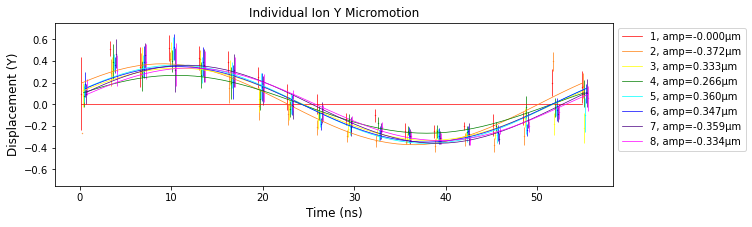

In [40]:
fig, (ax0) = plt.subplots(ncols=1, nrows=1, figsize=(10, 3))
ion_1.micromotion_fit_stackable(55)
ion_2.micromotion_fit_stackable(55)
ion_3.micromotion_fit_stackable(55)
ion_4.micromotion_fit_stackable(55)
ion_5.micromotion_fit_stackable(55)
ion_6.micromotion_fit_stackable(55)
ion_7.micromotion_fit_stackable(55)
ion_8.micromotion_fit_stackable(55)
ion_1.plot_y_micromotion_stackable()
ion_2.plot_y_micromotion_stackable()
ion_3.plot_y_micromotion_stackable()
ion_4.plot_y_micromotion_stackable()
ion_5.plot_y_micromotion_stackable()
ion_6.plot_y_micromotion_stackable()
ion_7.plot_y_micromotion_stackable()
ion_8.plot_y_micromotion_stackable()
ax0.set_title("Individual Ion Y Micromotion", fontsize = 12) # change the title
ax0.set_xlabel('Time (ns)',fontsize = 12)
ax0.set_ylabel('Displacement (Y)',fontsize = 12)
ax0.set_ylim(-.75,.75)
ax0.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
fig.savefig('Saved Figs/Stacked Micromotion Fit.svg')

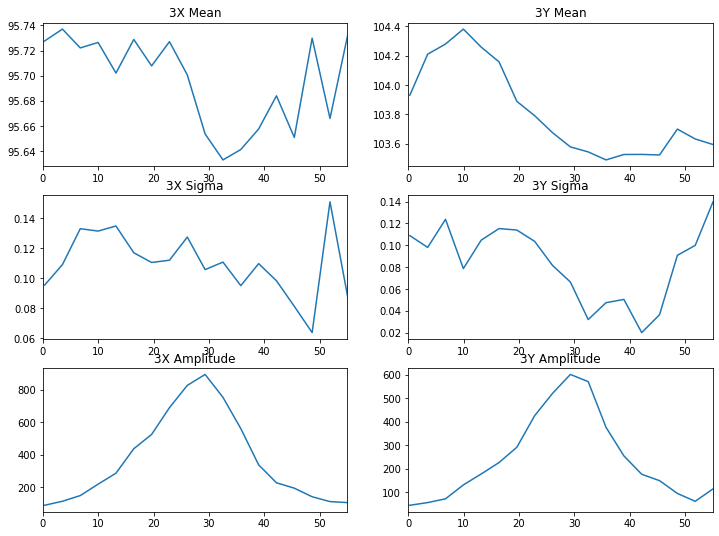

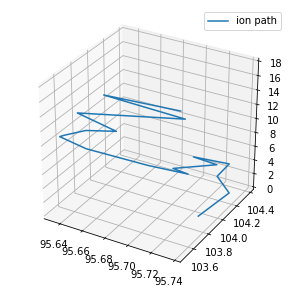

In [37]:
ion_3.plot_micromotion()